Question 1

In [3]:
# L'équation différentielle est dP/dt = r*P*(1-P/K) avec:
# r = 0.05 (taux de croissance)
# K = 100000 (capacité maximale)
# P0 = 1000 (clients initiaux)

import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
r = 0.05  # taux de croissance
K = 100000  # capacité maximale (taille du marché)
P0 = 1000  # nombre initial de clients

Question 2

In [4]:
# Au début, quand P est petit comparé à K, (1-P/K) est proche de 1
# Donc dP/dt ≈ r*P, ce qui correspond à une croissance exponentielle
# Par exemple quand P = 1000:
P_debut = 1000
croissance_debut = r * P_debut * (1 - P_debut/K)
print(f"Taux de croissance initial: {croissance_debut} clients par unité de temps")

# À la fin, quand P approche K, (1-P/K) tend vers 0
# Donc dP/dt devient très petit, ce qui correspond à une saturation
P_fin = 90000
croissance_fin = r * P_fin * (1 - P_fin/K)
print(f"Taux de croissance vers la fin: {croissance_fin} clients par unité de temps")

Taux de croissance initial: 49.5 clients par unité de temps
Taux de croissance vers la fin: 449.9999999999999 clients par unité de temps


Question 3

In [ ]:
# Notre équation:
# P(t+h) = P(t) + h * r * P(t) * (1 - P(t)/K)

def equation_euler(P, r, K, h):
    """Calcule la prochaine valeur de P selon la méthode d'Euler"""
    return P + h * r * P * (1 - P/K)

Question 4

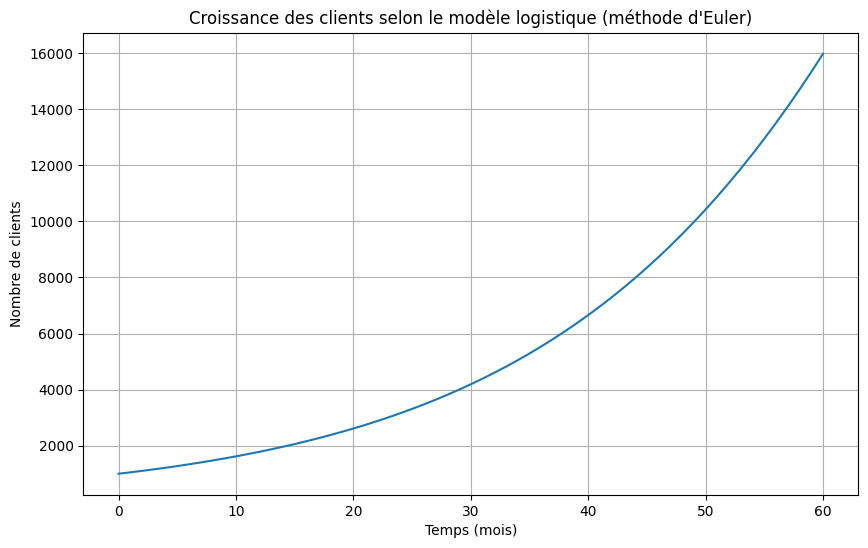

In [ ]:
# Implémentation avec un pas h = 1 (1 mois par exemple)
h = 1
temps_max = 60

# Initialisation des listes pour stocker les résultats
temps = np.arange(0, temps_max + 1, h)
population = np.zeros(len(temps))
population[0] = P0

# Application de la méthode d'Euler
for i in range(1, len(temps)):
    population[i] = equation_euler(population[i-1], r, K, h)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, population)
plt.xlabel('Temps (mois)')
plt.ylabel('Nombre de clients')
plt.title('Croissance des clients selon le modèle logistique (méthode d\'Euler)')
plt.grid(True)
plt.show()

# À quel moment atteint-on 50000 clients (50% du marché)?
for i in range(len(temps)):
    if population[i] >= 50000:
        print(f"La startup atteint 50 000 clients après environ {temps[i]:.1f} mois")
        break

Partie 2: Question 1

In [7]:
# La solution analytique P(t) = K*P0 / (P0 + (K-P0)*exp(-r*t))
# Au début (t=0): P(0) = K*P0 / (P0 + (K-P0)) = K*P0/K = P0
# Quand t tend vers l'infini: exp(-r*t) tend vers 0, donc P(t) tend vers K

def solution_analytique(t, P0, r, K):
    """Calcule la solution analytique de l'équation logistique"""
    return K * P0 / (P0 + (K - P0) * np.exp(-r * t))

# Vérification au temps t=0
t_test = 0
P_analytique = solution_analytique(t_test, P0, r, K)
print(f"À t=0, P = {P_analytique} (devrait être égal à P0 = {P0})")

# Vérification pour t très grand
t_test = 1000
P_analytique = solution_analytique(t_test, P0, r, K)
print(f"À t très grand, P ≈ {P_analytique:.1f} (devrait être proche de K = {K})")

À t=0, P = 1000.0 (devrait être égal à P0 = 1000)
À t très grand, P ≈ 100000.0 (devrait être proche de K = 100000)


Question 2

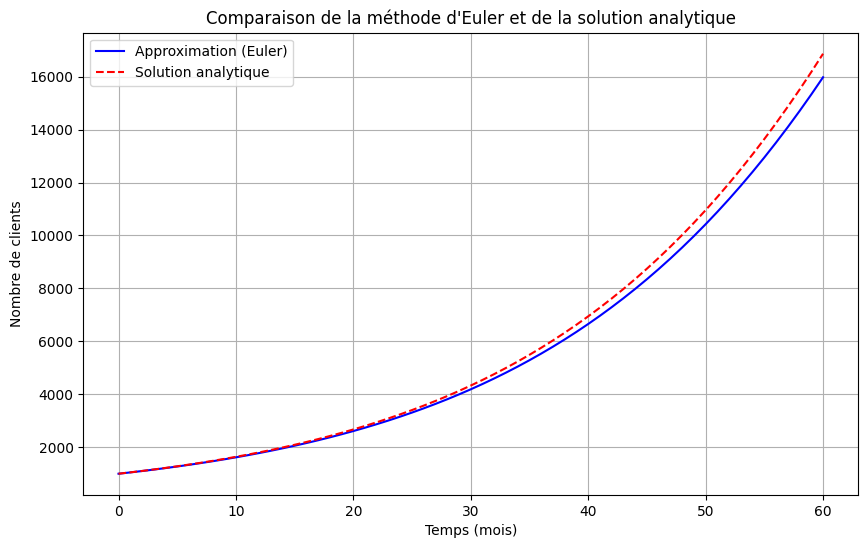

In [8]:
# Implémentation de la solution analytique sur la même plage de temps
population_analytique = [solution_analytique(t, P0, r, K) for t in temps]

# Comparaison des deux solutions
plt.figure(figsize=(10, 6))
plt.plot(temps, population, 'b-', label='Approximation (Euler)')
plt.plot(temps, population_analytique, 'r--', label='Solution analytique')
plt.xlabel('Temps (mois)')
plt.ylabel('Nombre de clients')
plt.title('Comparaison de la méthode d\'Euler et de la solution analytique')
plt.legend()
plt.grid(True)
plt.show()

Question 3

In [9]:
# Calcul de l'erreur quadratique moyenne (MSE) pour différentes valeurs de pas
def calculer_mse(h_valeur):
    temps_h = np.arange(0, temps_max + 1, h_valeur)
    population_h = np.zeros(len(temps_h))
    population_h[0] = P0
    
    # Application de la méthode d'Euler avec le pas h
    for i in range(1, len(temps_h)):
        population_h[i] = equation_euler(population_h[i-1], r, K, h_valeur)
    
    # Solution analytique aux mêmes points de temps
    solution_exacte = [solution_analytique(t, P0, r, K) for t in temps_h]
    
    # Calcul du MSE
    erreurs = [(population_h[i] - solution_exacte[i])**2 for i in range(len(temps_h))]
    mse = sum(erreurs) / len(erreurs)
    
    return mse

# Tester avec différentes valeurs de pas
pas_valeurs = [1, 0.5, 0.1]
for h_test in pas_valeurs:
    mse = calculer_mse(h_test)
    print(f"MSE avec h = {h_test}: {mse:.2f}")

MSE avec h = 1: 125390.24
MSE avec h = 0.5: 33737.90
MSE avec h = 0.1: 1431.47


Question 4

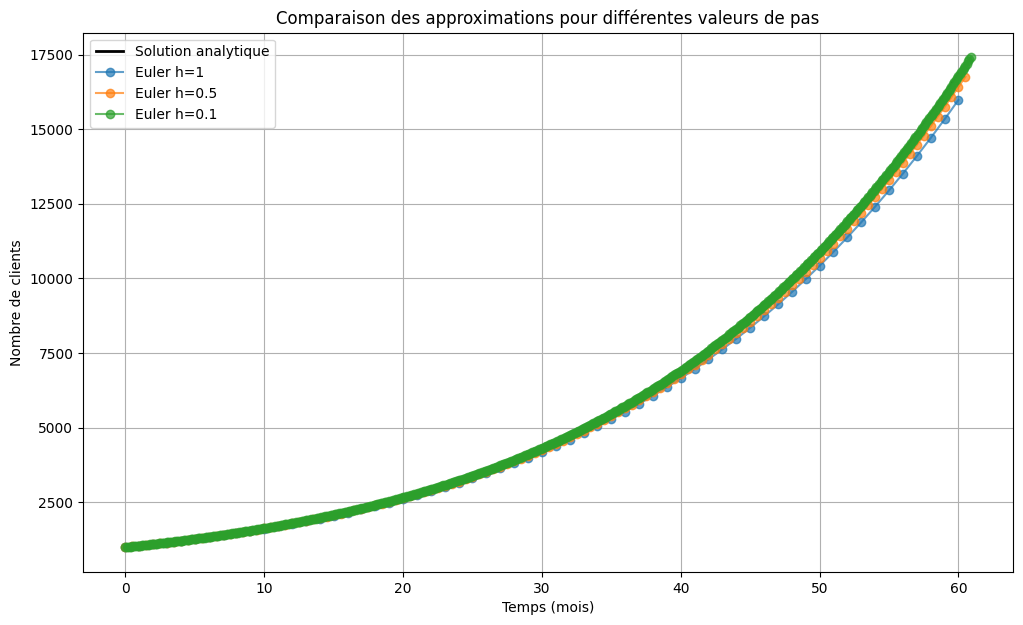

In [10]:
# Traçons les courbes pour différentes valeurs de pas
plt.figure(figsize=(12, 7))

# Solution analytique (référence)
temps_ref = np.linspace(0, temps_max, 1000)
solution_ref = [solution_analytique(t, P0, r, K) for t in temps_ref]
plt.plot(temps_ref, solution_ref, 'k-', label='Solution analytique', linewidth=2)

# Approximations pour différents pas
for h_test in pas_valeurs:
    temps_h = np.arange(0, temps_max + 1, h_test)
    population_h = np.zeros(len(temps_h))
    population_h[0] = P0
    
    for i in range(1, len(temps_h)):
        population_h[i] = equation_euler(population_h[i-1], r, K, h_test)
    
    plt.plot(temps_h, population_h, 'o-', label=f'Euler h={h_test}', alpha=0.7)

plt.xlabel('Temps (mois)')
plt.ylabel('Nombre de clients')
plt.title('Comparaison des approximations pour différentes valeurs de pas')
plt.legend()
plt.grid(True)
plt.show()

Partie 3: Question 1

Aperçu des données:
   Jour  Utilisateurs
0     0          1000
1     1          1047
2     2          1080
3     3          1154
4     4          1261


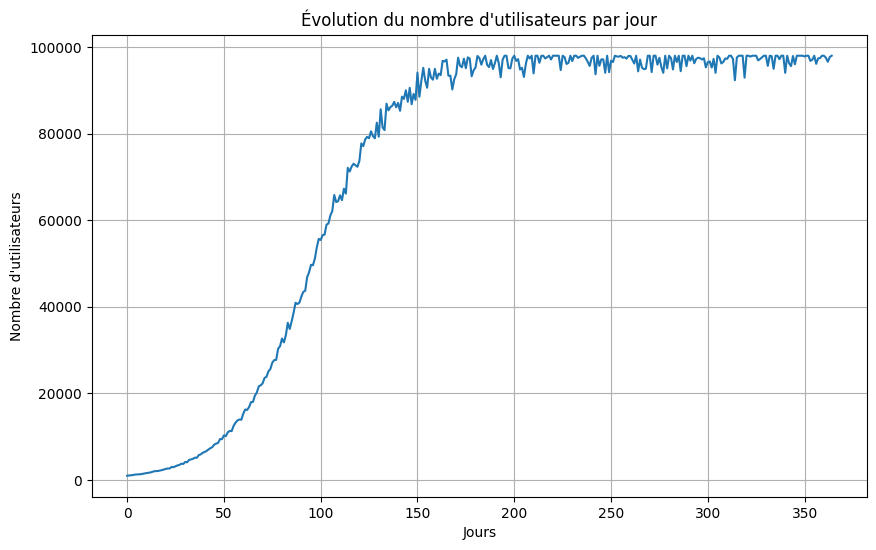

In [11]:
import pandas as pd

# Lecture du fichier CSV
try:
    data = pd.read_csv('Dataset_nombre_utilisateurs.csv')
    
    # Affichage des premières lignes pour comprendre la structure
    print("Aperçu des données:")
    print(data.head())
    
    # Tracer la courbe
    plt.figure(figsize=(10, 6))
    plt.plot(data['Jour'], data['Utilisateurs'])
    plt.xlabel('Jours')
    plt.ylabel('Nombre d\'utilisateurs')
    plt.title('Évolution du nombre d\'utilisateurs par jour')
    plt.grid(True)
    plt.show()
    
except FileNotFoundError:
    print("Le fichier Dataset_nombre_utilisateurs.csv n'a pas été trouvé!")

Question 2

50% de la saturation (49000 utilisateurs) atteints au jour 95


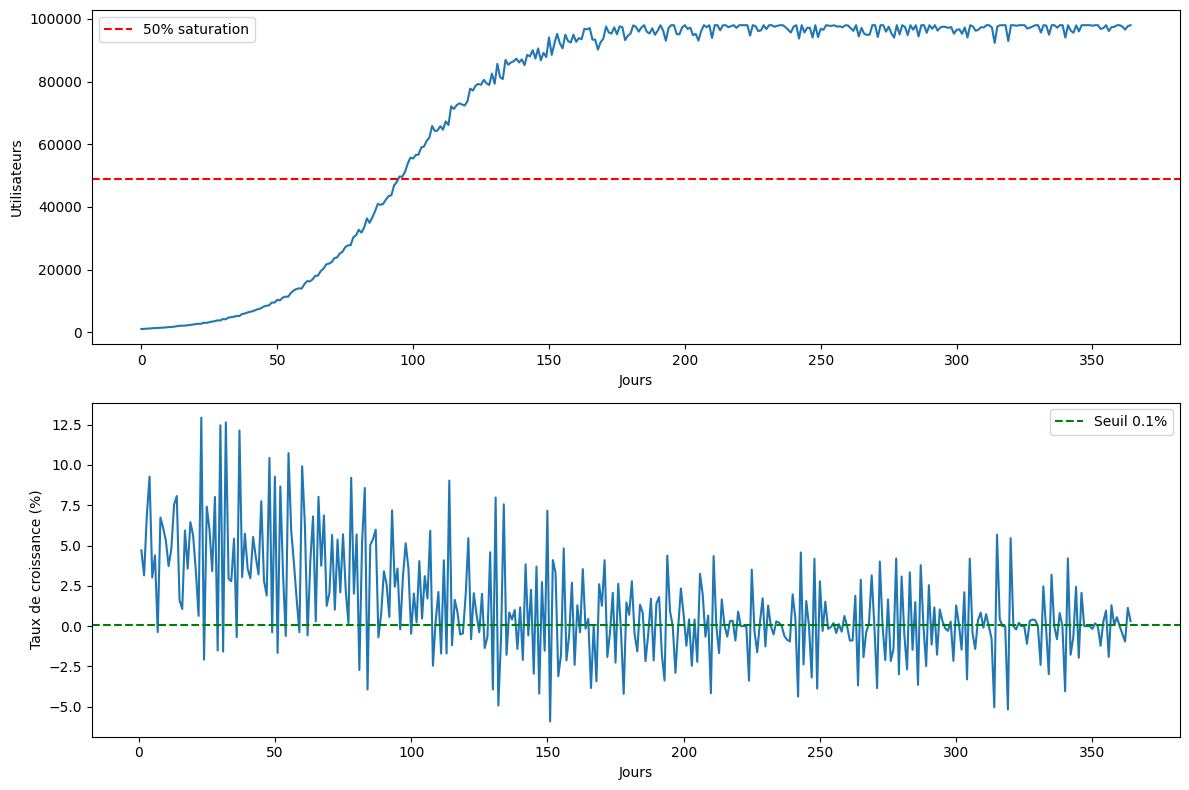

In [12]:
# Pour déterminer la saturation, nous pouvons calculer le taux de croissance quotidien
if 'data' in locals():
    # Calcul du taux de croissance quotidien
    data['Taux_croissance'] = data['Utilisateurs'].pct_change() * 100
    
    # On peut considérer que la saturation est atteinte quand le taux de croissance devient très faible
    # Par exemple, moins de 0.1% pendant plusieurs jours consécutifs
    
    seuil_saturation = 0.1
    jours_consecutifs = 7
    
    for i in range(len(data) - jours_consecutifs):
        if all(data['Taux_croissance'][i+1:i+jours_consecutifs+1] < seuil_saturation):
            jour_saturation = data['Jour'][i]
            utilisateurs_saturation = data['Utilisateurs'][i]
            print(f"Saturation atteinte vers le jour {jour_saturation} avec {utilisateurs_saturation} utilisateurs")
            break
    
    # Pour déterminer quand on atteint 50% de la saturation
    utilisateurs_max = data['Utilisateurs'].max()
    seuil_50_pourcent = utilisateurs_max * 0.5
    
    jour_50_pourcent = data[data['Utilisateurs'] >= seuil_50_pourcent]['Jour'].iloc[0]
    print(f"50% de la saturation ({seuil_50_pourcent:.0f} utilisateurs) atteints au jour {jour_50_pourcent}")
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(data['Jour'], data['Utilisateurs'])
    plt.axhline(y=seuil_50_pourcent, color='r', linestyle='--', label='50% saturation')
    plt.xlabel('Jours')
    plt.ylabel('Utilisateurs')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(data['Jour'][1:], data['Taux_croissance'][1:])
    plt.axhline(y=seuil_saturation, color='g', linestyle='--', label=f'Seuil {seuil_saturation}%')
    plt.xlabel('Jours')
    plt.ylabel('Taux de croissance (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Question 3

In [ ]:
# Calculer la MSE entre les données réelles et les modèles sur différents intervalles
if 'data' in locals():
    # Supposons que nous voulons recalibrer les paramètres du modèle sur les données réelles
    # Estimation des paramètres: K, r, P0 à partir des données
    
    # K peut être estimé comme le maximum des utilisateurs observés
    K_estime = data['Utilisateurs'].max()
    
    # P0 est la valeur initiale
    P0_estime = data['Utilisateurs'].iloc[0]
    
    # Pour estimer r, nous pouvons utiliser une optimisation simple
    from scipy.optimize import minimize
    
    def modele_mse(r_val):
        temps_data = data['Jour'].values
        utilisateurs_data = data['Utilisateurs'].values
        
        # Prédictions selon le modèle analytique
        predictions = [solution_analytique(t, P0_estime, r_val, K_estime) for t in temps_data]
        
        # Calcul du MSE
        mse = np.mean((predictions - utilisateurs_data)**2)
        return mse
    
    # Optimisation pour trouver r
    resultat = minimize(modele_mse, 0.05)
    r_estime = resultat.x[0]
    
    print(f"Paramètres estimés: K={K_estime:.0f}, r={r_estime:.4f}, P0={P0_estime:.0f}")
    
    # Calcul des prédictions avec les paramètres estimés
    temps_data = data['Jour'].values
    modele_euler = np.zeros(len(temps_data))
    modele_euler[0] = P0_estime
    
    for i in range(1, len(temps_data)):
        modele_euler[i] = equation_euler(modele_euler[i-1], r_estime, K_estime, 1)
    
    modele_analytique = [solution_analytique(t, P0_estime, r_estime, K_estime) for t in temps_data]
    
    # Calcul de la MSE pour différents intervalles
    intervalles = [(0, 90), (90, 180), (180, 270), (270, 365)]
    
    for debut, fin in intervalles:
        # Filtrer les données pour l'intervalle
        masque = (data['Jour'] >= debut) & (data['Jour'] <= fin)
        
        # MSE pour Euler
        mse_euler = np.mean((modele_euler[masque] - data['Utilisateurs'][masque])**2)
        
        # MSE pour analytique
        mse_analytique = np.mean((np.array(modele_analytique)[masque] - data['Utilisateurs'][masque].values)**2)
        
        print(f"Intervalle [{debut}, {fin}]:")
        print(f"  MSE Euler: {mse_euler:.2f}")
        print(f"  MSE Analytique: {mse_analytique:.2f}")

Paramètres estimés: K=98000, r=5.5612, P0=1000
Intervalle [0, 90]:
  MSE Euler: inf
  MSE Analytique: 7236497362.89
Intervalle [90, 180]:
  MSE Euler: inf
  MSE Analytique: 596657891.97
Intervalle [180, 270]:
  MSE Euler: inf
  MSE Analytique: 3104919.93
Intervalle [270, 365]:
  MSE Euler: inf
  MSE Analytique: 2538557.34


/var/folders/_l/nv3cdq9j3t3bhx3_3lhlj4n40000gn/T/ipykernel_54027/699271815.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return P + h * r * P * (1 - P/K)


Question 4

Données réelles: min=1000, max=98000
Modèle Euler: min=-inf, max=172206.16996340442
Modèle analytique: min=1000.0, max=98000.0


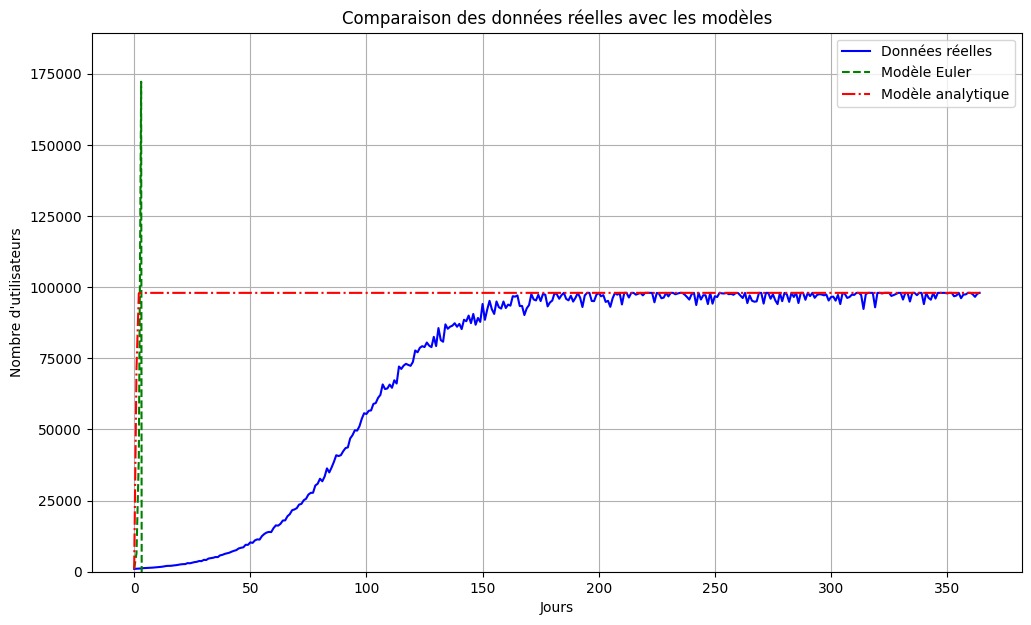

In [ ]:
# Vérifier les données avant de tracer
if 'data' in locals() and 'modele_euler' in locals() and 'modele_analytique' in locals():
    # Vérifier les dimensions et les types
    print(f"Données réelles: min={data['Utilisateurs'].min()}, max={data['Utilisateurs'].max()}")
    print(f"Modèle Euler: min={np.min(modele_euler)}, max={np.max(modele_euler)}")
    print(f"Modèle analytique: min={np.min(modele_analytique)}, max={np.max(modele_analytique)}")
    
    # S'assurer que toutes les données sont de type numérique
    if not np.issubdtype(data['Utilisateurs'].dtype, np.number):
        data['Utilisateurs'] = data['Utilisateurs'].astype(float)
    
    # Vérifier qu'il n'y a pas de valeurs aberrantes
    if np.max(modele_euler) > 1e10 or np.max(modele_analytique) > 1e10:
        print("ATTENTION: Valeurs extrêmement élevées détectées!")
        
        # Limiter les valeurs aberrantes (facultatif)
        max_acceptable = data['Utilisateurs'].max() * 2
        modele_euler = np.clip(modele_euler, 0, max_acceptable)
        modele_analytique = np.clip(np.array(modele_analytique), 0, max_acceptable)
    
    # Tracer le graphique avec plus de contrôle
    plt.figure(figsize=(12, 7))
    plt.plot(data['Jour'], data['Utilisateurs'], 'b-', label='Données réelles')
    plt.plot(data['Jour'], modele_euler, 'g--', label='Modèle Euler')
    plt.plot(data['Jour'], modele_analytique, 'r-.', label='Modèle analytique')
    
    # Limiter l'axe y à des valeurs raisonnables
    y_max = max(data['Utilisateurs'].max(), np.max(modele_euler), np.max(modele_analytique))
    y_max = min(y_max * 1.1, data['Utilisateurs'].max() * 2)
    plt.ylim(0, y_max)
    
    plt.xlabel('Jours')
    plt.ylabel('Nombre d\'utilisateurs')
    plt.title('Comparaison des données réelles avec les modèles')
    plt.legend()
    plt.grid(True)
    plt.show()

Question 5

In [24]:
# Écarts entre modèles et réalité - explication
print("\n===== ANALYSE DES ÉCARTS ENTRE MODÈLES ET RÉALITÉ =====")
print("Les écarts significatifs entre les modèles et la réalité peuvent s'expliquer par:")
print("\n1. Le modèle logistique suppose une croissance continue et régulière, alors que dans la réalité:")
print("   - Il peut y avoir des campagnes marketing ponctuelles")
print("   - Des événements saisonniers (par ex. périodes de vacances)")
print("   - Des variations économiques externes")
print("\n2. Le modèle n'intègre pas:")
print("   - Le taux de désabonnement (churn)")
print("   - Les effets de réseau (viralité)")
print("   - Les changements de stratégie de l'entreprise")
print("\n3. Les paramètres peuvent varier dans le temps:")
print("   - r n'est peut-être pas constant (efforts marketing variables)")
print("   - K peut évoluer (expansion du marché potentiel)")


===== ANALYSE DES ÉCARTS ENTRE MODÈLES ET RÉALITÉ =====
Les écarts significatifs entre les modèles et la réalité peuvent s'expliquer par:

1. Le modèle logistique suppose une croissance continue et régulière, alors que dans la réalité:
   - Il peut y avoir des campagnes marketing ponctuelles
   - Des événements saisonniers (par ex. périodes de vacances)
   - Des variations économiques externes

2. Le modèle n'intègre pas:
   - Le taux de désabonnement (churn)
   - Les effets de réseau (viralité)
   - Les changements de stratégie de l'entreprise

3. Les paramètres peuvent varier dans le temps:
   - r n'est peut-être pas constant (efforts marketing variables)
   - K peut évoluer (expansion du marché potentiel)


Question 6-7:

Modèle à deux phases:
  r1 (croissance initiale): 0.0487
  r2 (croissance ralentie): 0.0038
  Point de changement: jour 180
MSE modèle original: 1945856076.74
MSE nouveau modèle: 1707185.79
Amélioration: 99.91%


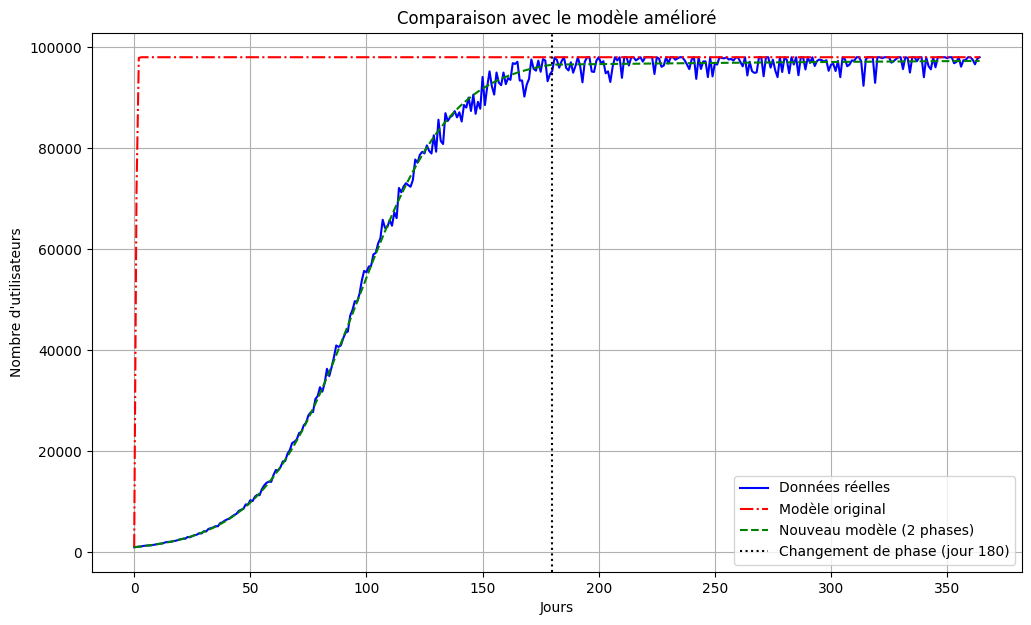

In [22]:
# Amélioration du modèle
if 'data' in locals():
    # On pourrait essayer un modèle plus complexe comme:
    # 1. Un modèle par morceaux avec différents r pour différentes phases
    # 2. Un modèle avec churn (désabonnements)
    # 3. Un modèle saisonnier
    
    # Exemple simple: modèle à deux phases
    # Phase 1: Croissance rapide (0-180 jours)
    # Phase 2: Croissance ralentie (181-365 jours)
    
    def modele_deux_phases(temps, P0, r1, r2, K, point_changement):
        utilisateurs = np.zeros(len(temps))
        utilisateurs[0] = P0
        
        for i in range(1, len(temps)):
            if temps[i] <= point_changement:
                r = r1
            else:
                r = r2
                
            utilisateurs[i] = utilisateurs[i-1] + utilisateurs[i-1] * r * (1 - utilisateurs[i-1]/K)
            
        return utilisateurs
    
    # Fonction pour calculer MSE avec ce nouveau modèle
    def modele_deux_phases_mse(params):
        r1, r2, point_changement = params
        temps_data = data['Jour'].values
        utilisateurs_data = data['Utilisateurs'].values
        
        predictions = modele_deux_phases(temps_data, P0_estime, r1, r2, K_estime, point_changement)
        
        mse = np.mean((predictions - utilisateurs_data)**2)
        return mse
    
    # Optimisation pour trouver r1, r2 et point_changement
    from scipy.optimize import minimize
    
    # Valeurs initiales
    initial_guess = [0.05, 0.02, 180]  # r1, r2, point_changement
    
    # Limites: r1, r2 positifs, point_changement entre 30 et 330 jours
    bounds = [(0.001, 0.5), (0.001, 0.5), (30, 330)]
    
    resultat = minimize(modele_deux_phases_mse, initial_guess, bounds=bounds, method='L-BFGS-B')
    r1_estime, r2_estime, point_changement_estime = resultat.x
    
    print(f"Modèle à deux phases:")
    print(f"  r1 (croissance initiale): {r1_estime:.4f}")
    print(f"  r2 (croissance ralentie): {r2_estime:.4f}")
    print(f"  Point de changement: jour {point_changement_estime:.0f}")
    
    # Calcul des prédictions avec ce nouveau modèle
    nouveau_modele = modele_deux_phases(data['Jour'].values, P0_estime, 
                                      r1_estime, r2_estime, K_estime, point_changement_estime)
    
    # Calcul de la MSE globale
    mse_nouveau_modele = np.mean((nouveau_modele - data['Utilisateurs'].values)**2)
    mse_ancien_modele = np.mean((np.array(modele_analytique) - data['Utilisateurs'].values)**2)
    
    print(f"MSE modèle original: {mse_ancien_modele:.2f}")
    print(f"MSE nouveau modèle: {mse_nouveau_modele:.2f}")
    print(f"Amélioration: {(1 - mse_nouveau_modele/mse_ancien_modele)*100:.2f}%")
    
    # Traçage des courbes
    plt.figure(figsize=(12, 7))
    plt.plot(data['Jour'], data['Utilisateurs'], 'b-', label='Données réelles')
    plt.plot(data['Jour'], modele_analytique, 'r-.', label='Modèle original')
    plt.plot(data['Jour'], nouveau_modele, 'g--', label='Nouveau modèle (2 phases)')
    plt.axvline(x=point_changement_estime, color='k', linestyle=':', 
             label=f'Changement de phase (jour {point_changement_estime:.0f})')
    plt.xlabel('Jours')
    plt.ylabel('Nombre d\'utilisateurs')
    plt.title('Comparaison avec le modèle amélioré')
    plt.legend()
    plt.grid(True)
    plt.show()

Partie 4: Ouverture

Analyse financière du nouveau produit SaaS sur 12 mois:

Mois	Utilisateurs	Revenus	Coûts serveurs	Coûts marketing	Bénéfice
0	500	5995€	1000€	22500€	-17505€
1	515	6175€	1000€	3105€	2070€
2	531	6367€	1000€	3115€	2252€
3	547	6559€	1000€	3115€	2444€
4	563	6750€	1000€	3115€	2636€
5	580	6954€	1000€	3125€	2830€
6	598	7170€	1000€	3135€	3035€
7	616	7386€	1000€	3135€	3251€
8	635	7614€	1000€	3145€	3469€
9	654	7841€	1000€	3145€	3697€
10	673	8069€	1000€	3145€	3925€
11	694	8321€	1000€	3165€	4157€
12	715	8573€	1000€	3165€	4408€

Bénéfice cumulé après 12 mois: 20669€
ROI après 12 mois: 28.3%
Point mort atteint au mois 7


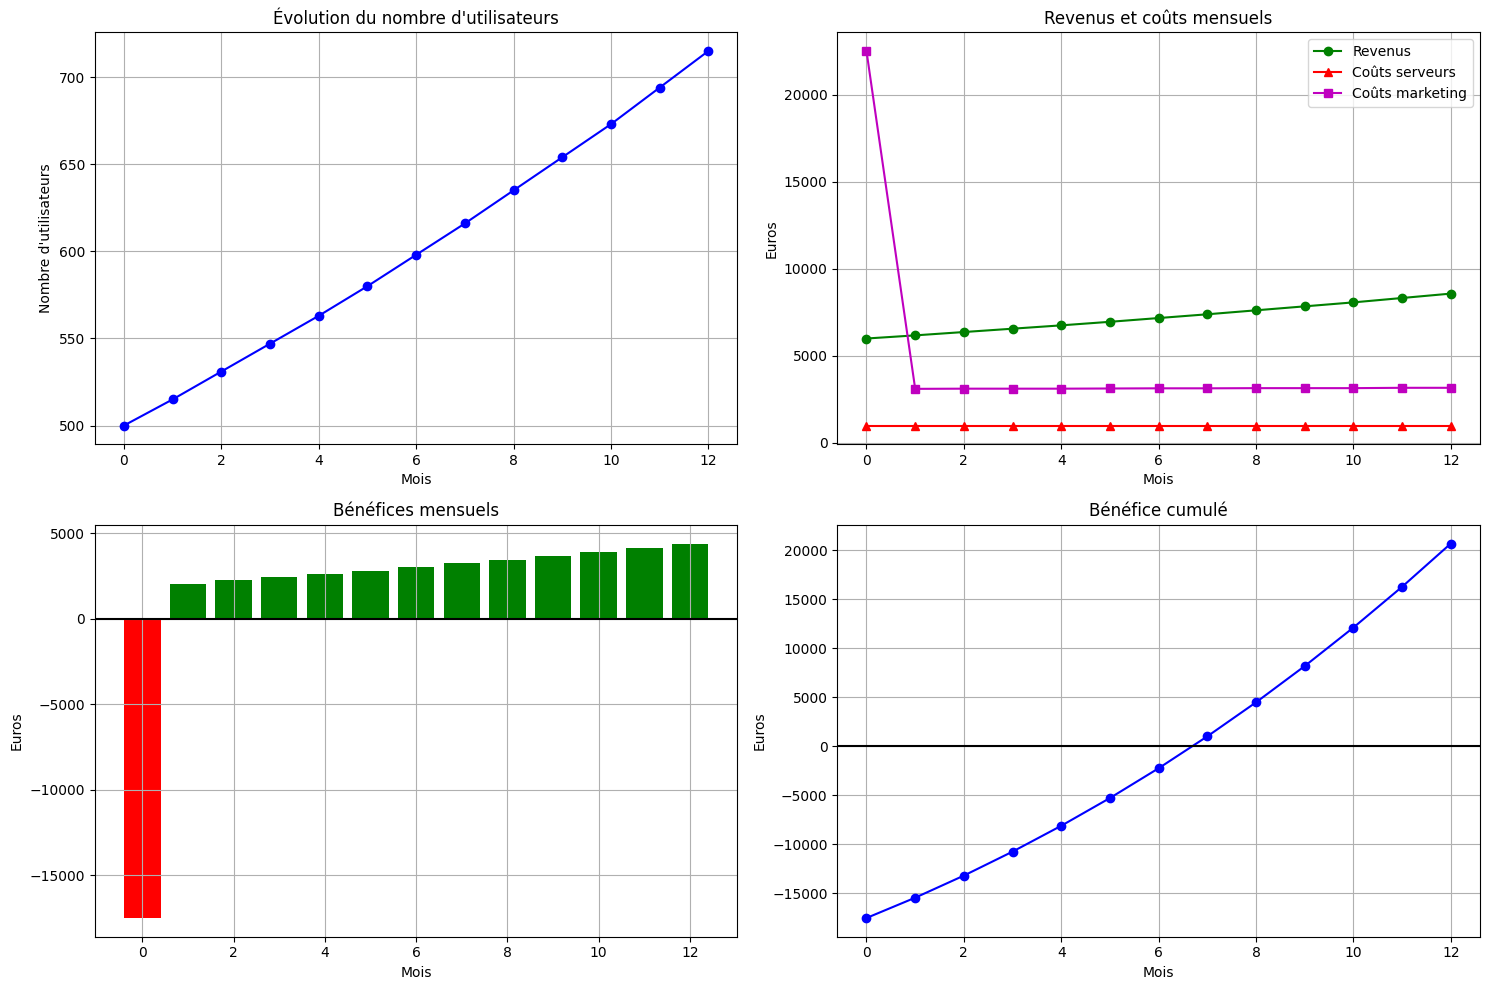

In [21]:
# Paramètres du nouveau produit
max_utilisateurs_serveur = 2000
prix_serveur_mensuel = 1000
cout_acquisition_utilisateur = 10
budget_marketing_total = 50000
prix_abonnement_mensuel = 11.99
taille_marche = 400000
part_marche = 0.20
utilisateurs_initiaux = 500

# Paramètres pour le modèle logistique
K_nouveau = taille_marche * part_marche
P0_nouveau = utilisateurs_initiaux
r_nouveau = 0.03

# Simulation sur 12 mois
mois = np.arange(0, 13)
utilisateurs = np.zeros(len(mois))
utilisateurs[0] = P0_nouveau

# Calcul de l'évolution du nombre d'utilisateurs avec le modèle logistique
for i in range(1, len(mois)):
    utilisateurs[i] = solution_analytique(i, P0_nouveau, r_nouveau, K_nouveau)

# Arrondir à l'entier le plus proche
utilisateurs = np.round(utilisateurs).astype(int)

# Calcul des coûts et revenus mensuels
revenus = np.zeros(len(mois))
couts_serveurs = np.zeros(len(mois))
couts_marketing = np.zeros(len(mois))
benefices = np.zeros(len(mois))

# Budget marketing: 35% au lancement, reste réparti sur les 11 mois suivants
budget_lancement = budget_marketing_total * 0.35
budget_mensuel = (budget_marketing_total - budget_lancement) / 11

# Coûts d'acquisition des nouveaux utilisateurs
cout_acquisition = np.zeros(len(mois))
for i in range(len(mois)):
    if i == 0:
        cout_acquisition[i] = utilisateurs[i] * cout_acquisition_utilisateur
    else:
        nouveau_utilisateurs = utilisateurs[i] - utilisateurs[i-1]
        cout_acquisition[i] = nouveau_utilisateurs * cout_acquisition_utilisateur

# Calcul pour chaque mois
for i in range(len(mois)):
    revenus[i] = utilisateurs[i] * prix_abonnement_mensuel
    
    nombre_serveurs = (utilisateurs[i] + max_utilisateurs_serveur - 1) // max_utilisateurs_serveur
    couts_serveurs[i] = nombre_serveurs * prix_serveur_mensuel
    
    if i == 0:
        couts_marketing[i] = budget_lancement + cout_acquisition[i]
    else:
        couts_marketing[i] = budget_mensuel + cout_acquisition[i]
    
    benefices[i] = revenus[i] - couts_serveurs[i] - couts_marketing[i]

# Résultats
print("Analyse financière du nouveau produit SaaS sur 12 mois:")
print("\nMois\tUtilisateurs\tRevenus\tCoûts serveurs\tCoûts marketing\tBénéfice")
for i in range(len(mois)):
    print(f"{i}\t{utilisateurs[i]}\t{revenus[i]:.0f}€\t{couts_serveurs[i]:.0f}€\t{couts_marketing[i]:.0f}€\t{benefices[i]:.0f}€")

# Bénéfice cumulé
benefice_cumule = np.cumsum(benefices)
print(f"\nBénéfice cumulé après 12 mois: {benefice_cumule[-1]:.0f}€")

# Analyse de rentabilité
roi = (benefice_cumule[-1] / (np.sum(couts_serveurs) + np.sum(couts_marketing))) * 100
print(f"ROI après 12 mois: {roi:.1f}%")

# Point mort
point_mort = None
for i in range(len(mois)):
    if benefice_cumule[i] >= 0:
        point_mort = i
        break

if point_mort is not None:
    print(f"Point mort atteint au mois {point_mort}")
else:
    print("Point mort non atteint dans les 12 premiers mois")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(mois, utilisateurs, 'b-o')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Évolution du nombre d\'utilisateurs')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(mois, revenus, 'g-o', label='Revenus')
plt.plot(mois, couts_serveurs, 'r-^', label='Coûts serveurs')
plt.plot(mois, couts_marketing, 'm-s', label='Coûts marketing')
plt.xlabel('Mois')
plt.ylabel('Euros')
plt.title('Revenus et coûts mensuels')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.bar(mois, benefices, color=['r' if x < 0 else 'g' for x in benefices])
plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Euros')
plt.title('Bénéfices mensuels')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(mois, benefice_cumule, 'b-o')
plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Euros')
plt.title('Bénéfice cumulé')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
print("\n===== CONCLUSION SUR LA RENTABILITÉ =====")

if benefice_cumule[-1] > 0:
    rentabilite = "rentable"
else:
    rentabilite = "non rentable"

print(f"Le business model est-il rentable?")
print(f"- D'après notre analyse, le business model semble {rentabilite} sur la période de 12 mois.")

if point_mort is not None:
    print(f"- Le point mort (break-even point) est atteint au mois {point_mort}.")
else:
    print("- Le point mort n'est pas atteint dans les 12 premiers mois.")

print(f"- Le ROI après 12 mois est de {roi:.1f}%.")

print("\nHypothèses qui manquent:")
print("1. Taux de churn (désabonnement): Notre modèle ne prend pas en compte les utilisateurs qui se désabonnent.")
print("2. Coûts opérationnels: Nous n'avons pas inclus les coûts de personnel, support client, maintenance, etc.")
print("3. Coûts de développement initial: L'investissement initial pour créer le produit n'est pas pris en compte.")
print("4. Saisonnalité: Les variations saisonnières ne sont pas considérées.")
print("5. Variation de prix: Possibilité de différents plans tarifaires ou promotions.")
print("6. Effet de réseau ou viralité: Impact des recommandations clients qui réduirait le coût d'acquisition.")
print("7. Inflation et évolution des coûts sur la période.")


===== CONCLUSION SUR LA RENTABILITÉ =====
Le business model est-il rentable?
- D'après notre analyse, le business model semble rentable sur la période de 12 mois.
- Le point mort (break-even point) est atteint au mois 7.
- Le ROI après 12 mois est de 28.3%.

Hypothèses qui manquent:
1. Taux de churn (désabonnement): Notre modèle ne prend pas en compte les utilisateurs qui se désabonnent.
2. Coûts opérationnels: Nous n'avons pas inclus les coûts de personnel, support client, maintenance, etc.
3. Coûts de développement initial: L'investissement initial pour créer le produit n'est pas pris en compte.
4. Saisonnalité: Les variations saisonnières ne sont pas considérées.
5. Variation de prix: Possibilité de différents plans tarifaires ou promotions.
6. Effet de réseau ou viralité: Impact des recommandations clients qui réduirait le coût d'acquisition.
7. Inflation et évolution des coûts sur la période.
